In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv('datasets/countries.csv')
data.head()
data.drop(columns=['Unnamed: 0', 'Country'], inplace=True)

In [3]:
data.head()

,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,GDDP
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)

In [5]:
data.head()

,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,GDDP
0,118,5,92,80,17,117,9,127,12
1,51,51,76,87,80,79,93,25,68
2,73,78,24,43,91,137,95,78,72
3,131,120,10,72,58,148,24,131,63
4,33,93,69,112,111,34,98,46,111


In [6]:
X = data.values

In [53]:
class KMeans:

    def __init__(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):

        random_index = random.sample(range(0, X.shape[0]), self.k)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            cluster_group = self.assign_cluster(X)
            old_cluster = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)

            if(old_cluster == self.centroids).all():
                break
        return cluster_group
    

    def assign_cluster(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distance = np.sqrt(np.dot(row-centroid, row-centroid))
                distances.append(distance)
            min_distance = min(distances)
            min_index = distances.index(min_distance)
            cluster_group.append(min_index)
            distances.clear()
        return np.array(cluster_group)
    
    def move_centroids(self, X, cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        return np.array(new_centroids)

In [54]:
km = KMeans(k=3,max_iter=1000)
y_means = km.fit_predict(X)

print(y_means[:5])
print(X[:5])

[2 0 0 2 1]
[[118   5  92  80  17 117   9 127  12]
 [ 51  51  76  87  80  79  93  25  68]
 [ 73  78  24  43  91 137  95  78  72]
 [131 120  10  72  58 148  24 131  63]
 [ 33  93  69 112 111  34  98  46 111]]


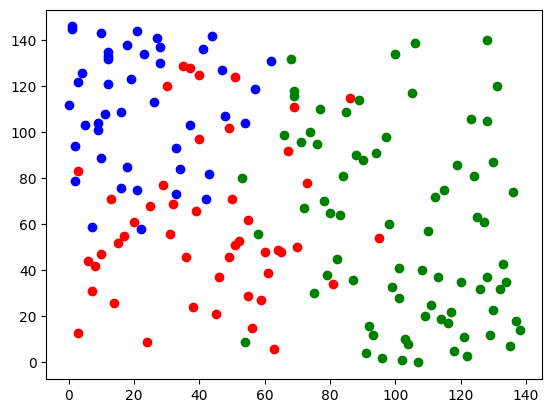

In [55]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')

plt.show()

In [57]:
from sklearn.cluster import KMeans

In [58]:
def elbow_method(X):
    wcss = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(2, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()


/home/acedhruv/Coding/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/acedhruv/Coding/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/acedhruv/Coding/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/acedhruv/Coding/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ac

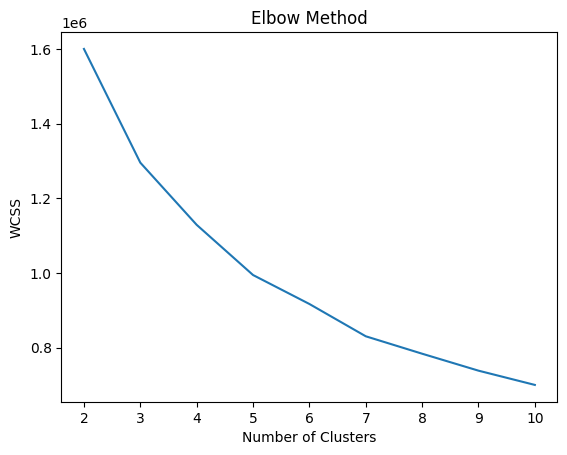

In [61]:
elbow_method(X)